In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()

## ILVSC data

In [2]:
ilvsc_data = pd.read_csv('data/ilvsc_data.csv')

In [3]:
ilvsc_data

,year,name,top5,params(M)
0,2010.0,LCC-SVM,28.20,0.0
1,2011.0,SIFT+FVs,26.20,0.0
2,2012.0,AlexNet,15.40,60.0
3,2013.0,OverFeat,13.24,144.0
4,2014.0,VGG-19,8.00,144.0
5,2015.0,ResNet-152,5.71,60.0
6,2016.0,ResNeXt-101 64x4,4.40,83.6
7,2017.0,PNASNet-5,3.80,86.1
8,2018.0,ResNeXt-101 32x48d,2.50,829.0
9,2019.0,BiT-L,1.54,1000.0


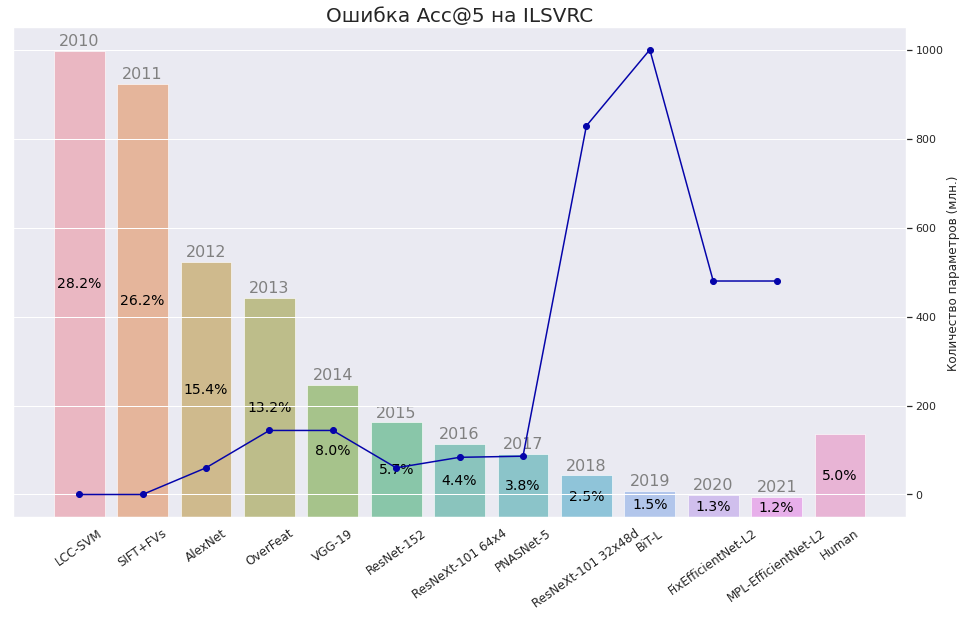

In [25]:
fig, ax = plt.subplots(figsize=(16, 9))
ax2 = ax.twinx()
sns.barplot(x=ilvsc_data.index, y=ilvsc_data['top5'], ax=ax, alpha=0.6)
ax.set_title('Ошибка Acc@5 на ILSVRC', fontsize=20)
ax.set_xticklabels(ilvsc_data['name'], rotation=35, fontsize=12)

for i, p in enumerate(ax.patches[:-1]):
    ax.annotate(
        f'{2010+i}', (p.get_x() + p.get_width() / 2., p.get_height()),
        ha='center', va='center', fontsize=16, color='gray', xytext=(0, 10),
        textcoords='offset points'
    )
    ax.annotate(
        f'{p.get_height():.1f}%', (p.get_x() + p.get_width() / 2., p.get_height() / 2.),
        ha='center', va='center', fontsize=14, color='black', xytext=(0, 0),
        textcoords='offset points'
    )
p = ax.patches[-1]
ax.annotate(
        f'{p.get_height():.1f}%', (p.get_x() + p.get_width() / 2., p.get_height() / 2.),
        ha='center', va='center', fontsize=14, color='black', xytext=(0, 0),
        textcoords='offset points'
    )
ax.get_yaxis().set_visible(False)

ax2.set_ylabel('Количество параметров (млн.)')
ax2.plot(ilvsc_data.index, ilvsc_data['params(M)'], color=sns.xkcd_rgb['royal blue'], linewidth=1.5, marker='o')
plt.show()

## CPU/GPU Perfomance

In [2]:
perf_data = pd.read_csv('data/cpu_gpu_performance.csv', parse_dates=['Release date'], index_col='Release date')

In [3]:
perf_data.head()

,Name,SP GFLOPS,Device type
Release date,,,
2001-01-07,P4,3.20,CPU
2003-01-27,FX 5800,19.47,GPU
2004-01-06,P4,5.60,CPU
2006-01-06,Xeon 5140,24.00,CPU
2007-01-01,Q6700,85.44,CPU


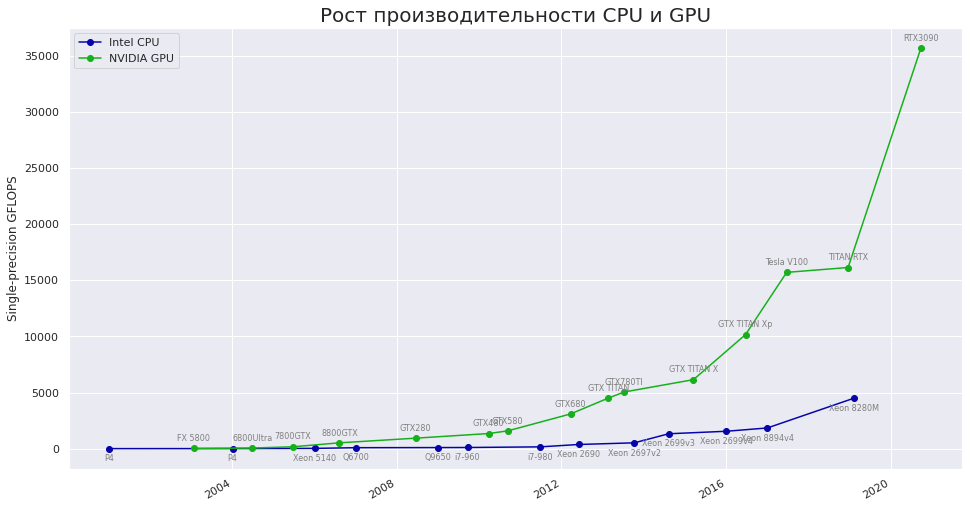

In [10]:
fig, ax = plt.subplots(figsize=(16, 9))
perf_data[perf_data['Device type'] == 'CPU']['SP GFLOPS'].plot(ax=ax, marker='o', color=sns.xkcd_rgb['royal blue'], label='Intel CPU')
perf_data[perf_data['Device type'] == 'GPU']['SP GFLOPS'].plot(ax=ax, marker='o', color=sns.xkcd_rgb['green'], label='NVIDIA GPU')
ax.legend()
for row in perf_data.itertuples():
    ytext = 10 if row[3] == 'GPU' else -10
    ax.annotate(
        row.Name, (row.Index, row[2]), ha='center', va='center',
        fontsize=8, color='gray', xytext=(0, ytext), textcoords='offset points'
    )
ax.set_xlabel('')
ax.set_ylabel('Single-precision GFLOPS')
ax.set_title('Рост производительности CPU и GPU', fontsize=20)
plt.show()

## Arxiv stats

In [13]:
arxiv_data = pd.read_csv('data/arxiv_stats.csv', index_col='year')

In [14]:
arxiv_data

,count
year,
2009,327
2010,537
2011,726
2012,1686
2013,1920
2014,2564
2015,3816
2016,6073
2017,9182


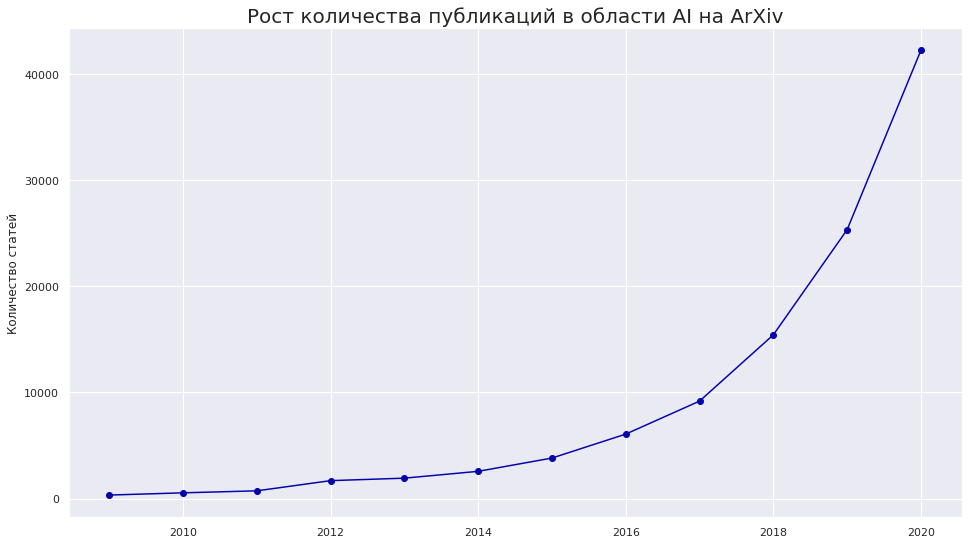

In [16]:
fig, ax = plt.subplots(figsize=(16, 9))
arxiv_data['count'].plot(ax=ax, marker='o', color=sns.xkcd_rgb['royal blue'])
ax.set_xlabel('')
ax.set_ylabel('Количество статей')
ax.set_title('Рост количества публикаций в области AI на ArXiv', fontsize=20)
plt.show()

## Websites data

In [17]:
websites_data = pd.read_csv('data/websites_stats.csv', index_col='year')

In [18]:
websites_data

,websites
year,
1991,1
1992,10
1993,130
1994,2738
1995,23500
1996,257601
1997,1117255
1998,2410067
1999,3177453


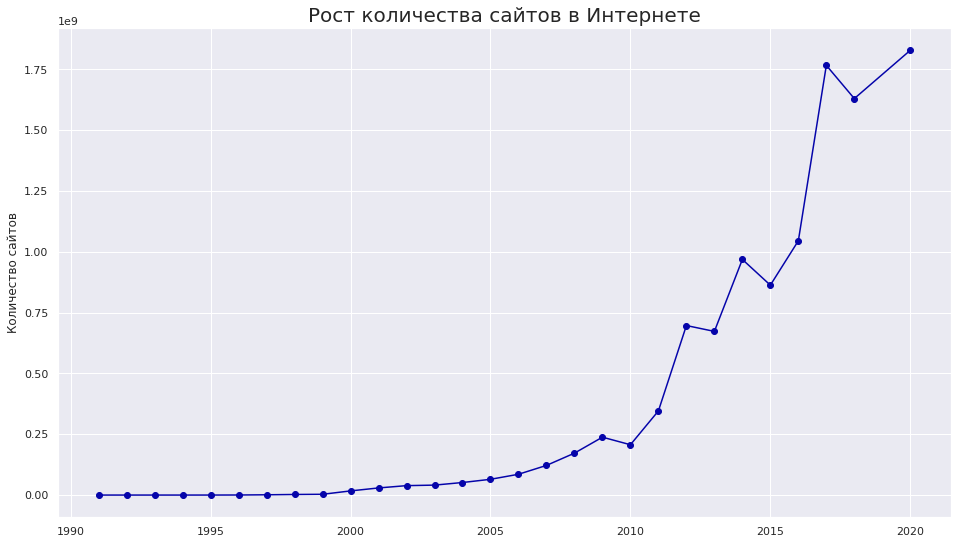

In [21]:
fig, ax = plt.subplots(figsize=(16, 9))
websites_data['websites'].plot(ax=ax, marker='o', color=sns.xkcd_rgb['royal blue'])
ax.set_xlabel('')
ax.set_ylabel('Количество сайтов')
ax.set_title('Рост количества сайтов в Интернете', fontsize=20)
plt.show()